<center><img src="https://s4.uupload.ir/files/colab_profile_cjkc.jpg"  width="1000"/>

# ***Contact Information***
    
Hodjat.shirmard@ut.ac.ir | Hodjat.shirmard@gmail.com | www.linkedin.com/in/Hojat-Shirmard |https://github.com/Hojat-Shirmard      

e.farahbakhsh@outlook.com | https://www.linkedin.com/in/ehsanfarahbakhsh/ | https://github.com/e-farahbakhsh

rohitash.chandra@unsw.edu.au | https://www.linkedin.com/in/rohitash-chandra | https://github.com/rohitash-chandra

# ***Machine Learning in Remote Sensing for Extracting Geological Target Features***

The emerging suite of machine learning techniques has made it easy to make sense of big data for data scientists. These methods are gaining popularity in geosciences to discover hidden associations in geological, geophysical and geochemical data used for various purposes, considering the availability of broad and varied geodata sets.

As a primary step in mineral exploration, a variety of features are mapped such as lithological units, alteration types, structures, and minerals. These features are extracted to aid decision-making in targeting ore deposits. Different types of remote sensing data including satellite optical and radar, airborne, and drone-based data make it possible to overcome problems associated with mapping these important parameters on the field. The rapid increase in the volume of remote sensing data obtained from different platforms has allowed scientists to develop advanced, innovative, and powerful data processing methodologies. Machine learning methods can help in processing a wide range of remote sensing data and in determining the relationship between the reflectance continuum and features of interest. Moreover, these methods are robust in processing spectral and ground truth measurements against noise and uncertainties. In recent years, many studies have been carried out by supplementing geological surveys with remote sensing data, and this area is now considered a hotspot in geoscience research


---


<center><img src="https://uupload.ir/files/dyz4_18c83cec-d79b-45d3-a983-709867c7f101.jpg"  width="500"/>
    
<center><img src="https://uupload.ir/files/903b_fd0436cf-0ccd-47eb-86a4-0d381d7c2951.jpg"  width="500"/>   

# Introduction

A machine learning project may not be linear, but it has a number of well known steps:

* Define Problem.
* Prepare Data.
* Evaluate Algorithms.
* Improve Results.
* Present Results.

The best way to really come to terms with a new platform or tool is to work through a machine learning project end-to-end and cover the key steps. Namely, from loading data, summarizing data, evaluating algorithms and making some predictions.


![picture](https://s4.uupload.ir/files/drawing1_3c1u.jpg)


Here is an overview of what we are going to cover:

1. Installing the Python and required libraries.
2. Loading the dataset.
3. Summarizing the dataset.
4. Visualizing the dataset.
5. Evaluating some algorithms.
6. Making some predictions.





### Required Paaackages

There are some well-known packages which are used by the remote sensing community more often than the other ones. These packages provide basic requirements for a satellite image processing project such as image loading, georeferencing, matrix operations, image classification, data visualization, etc.

One can name much more packages which can be used in more specific projects but the most general packages are listed in the figure below. 

![](http://s14.picofile.com/file/8408928418/packages.PNG)

Let's import those packages that we want to work with.

> 1. rasterio (based on GDAL)
> 2. scikit-learn
> 3. numpy
> 4. matplotlib




In [2]:
# Some important and mostly-used packages are already installed on Google-Colab.
import numpy as np
import gdal
import matplotlib.pyplot as plt

In [3]:
# Some other packages require installation.
# They can be accessed from Github; or installed using "pip".
!pip install rasterio

# After successful installation, import the package.
import rasterio as rio

You should consider upgrading via the '/home/rohit/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [4]:
# Some packages are very large and you don't need to import the entire library.
# Just work with those methods that you'll work through your project.
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

## Introduction to Scikit-Learn

This is the [website](https://scikit-learn.org/stable/).

You can get started [here](https://scikit-learn.org/stable/getting_started.html); and find more tutorials [here](https://scikit-learn.org/stable/tutorial/index.html#tutorial-menu). Scikit-Learn also provides lots of [examples](https://scikit-learn.org/stable/auto_examples/index.html) which can be used to better understand the algorithms.

<center><img src="http://uupload.ir/files/l51z_ml_map.png"  width="2000"/>


# Problem Definition

What are we going to do?!

> Implement and end-to-end remote sensing image classification procedure in Python using open-source packages.

How are we going to do this?

> 1. Get familiar with the dataset.
> 2. Manipulate features.
> 3. Train a machine learning model (specifically **SVM**).
> 4. Evaluate the accuracy of out model.
> 5. Test our model on unseen data.

# Data Manipulation

The dataset we are going to work with

* Optical **Multuspectral** image
* ASTER with 14 bands (VNIR 15m-SWIR 30m-Thermal 90m) (resampled to 30m)
* **Ground truth** data (resampled to 30m)

> *ASTER data could be donwloaded freely within this link*
https://earthexplorer.usgs.gov/

## Data Loading

In the first step, we read our data in Python.

<center><img src="http://uupload.ir/files/5j0x_reading-and-writing-files-in-python_watermarked.png"  width="500"/>


In [5]:
# Use rasterio package to open images.
# Data can be read from Google Drive directory.

ASTER = rio.open('data/AST15.tif')
ASTER_array = ASTER.read()

#SENTINEL = rio.open('/content/SEN15.tif')
#SENTINEL_array = SENTINEL.read()

GT = rio.open('data/GT15.tif')
GT_array = GT.read()


In [6]:
ASTER_array.shape


(9, 577, 513)

In [7]:
# Let's see what these datasets look like.
print(ASTER_array.shape)
#print(SENTINEL_array.shape)
print(GT_array.shape)

(9, 577, 513)
(1, 577, 513)


In [8]:
nRows = ASTER_array.shape[1]
nCols = ASTER_array.shape[2]
Bands = ASTER_array.shape[0]

In [9]:
Bands

9

## Data Visualization

Visualization is the best way to become familiar with your dataset. Also, you can summarize the data by looking at some statistical features of the data.



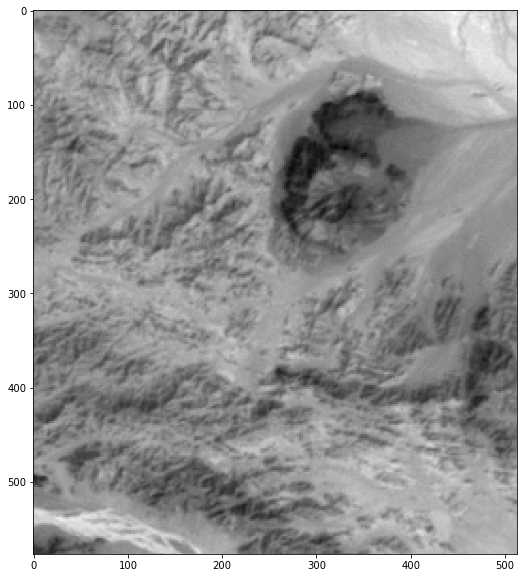

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(ASTER_array[5, :, :], cmap='gray')
plt.show()

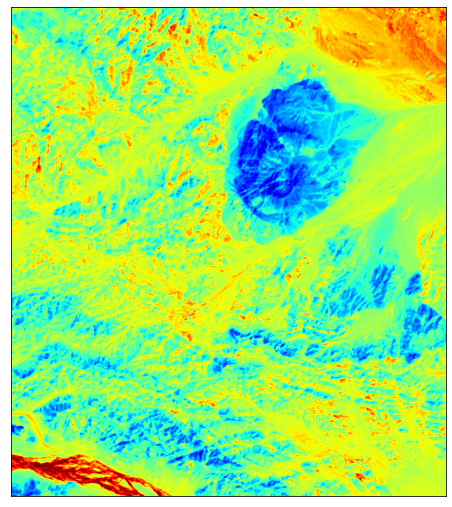

In [11]:
# Visualizing DSM
plt.figure(figsize=(9, 9))
plt.imshow(ASTER_array[0, :, :], cmap='jet')
plt.xticks([])
plt.yticks([])
plt.show()

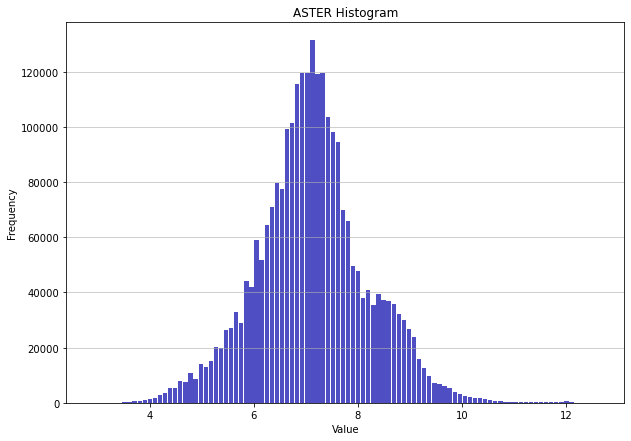

In [12]:
# Let's look at it's histogram!
plt.figure(figsize=(10, 7))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('ASTER Histogram')
n, bins, patches = plt.hist(x=ASTER_array.flatten(), bins=100, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [13]:
# Deal with outliers
#e.g. ASTER_array[ASTER_array > 60] = np.nan

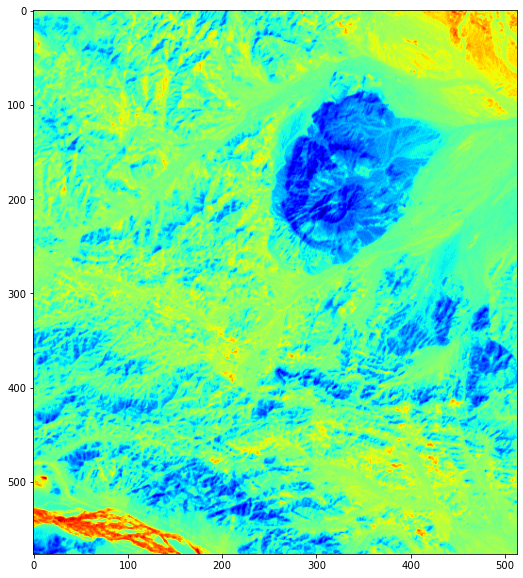

In [14]:
plt.figure(figsize=(10, 10))
plt.imshow(ASTER_array[2, :, :], cmap='jet')
plt.show()

In [15]:
# Correct for incorrect values (outliers).
#ASTER_array[ASTER_array > 50] = np.nan

#plt.figure(figsize=(10, 7))
#plt.grid(axis='y', alpha=0.75)
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.title('ASTER Histogram')
#n, bins, patches = plt.hist(x=ASTER_array.flatten(), bins=100, color='r',alpha=0.7, rwidth=0.85)

In [16]:
# Again, visualize the corrected data.
#plt.figure(figsize=(10, 7))
#plt.imshow(ASTER_array[0, :, :], cmap='jet')
#plt.xticks([])
#plt.yticks([])
#plt.show()

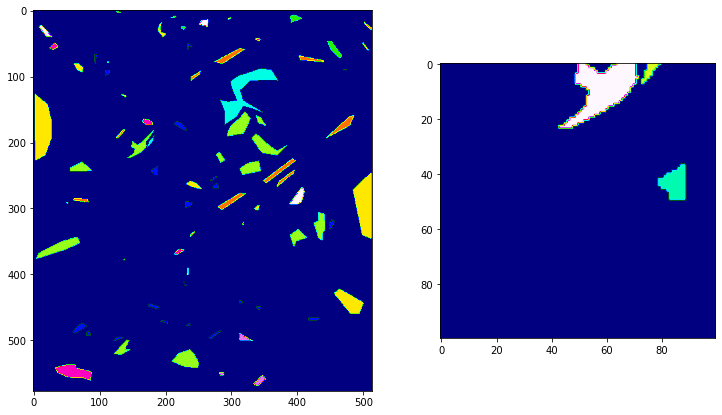

In [17]:
# OK. What's next? Ground truth data
fig = plt.figure(figsize=(13, 7))
gs = fig.add_gridspec(1, 5)
fig.add_subplot(gs[0, :3]), plt.imshow(GT_array[0, :, :], cmap='gist_ncar')
fig.add_subplot(gs[0, -2:]), plt.imshow(GT_array[0, 200:300, 100:200], cmap='gist_ncar')
plt.show()

In [18]:
list(np.unique(GT_array))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [19]:
# How many classes?
GT_array[GT_array == 255] = 0
classes = np.unique(GT_array)
print(classes)

[0 1 2 3 4 5 6 7 8 9]


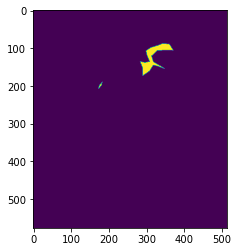

In [20]:
c = 2
cls = np.zeros((nRows, nCols), dtype=int)
cls[GT_array[0, :, :] == c] = 1

plt.figure()
plt.imshow(cls)
plt.show()

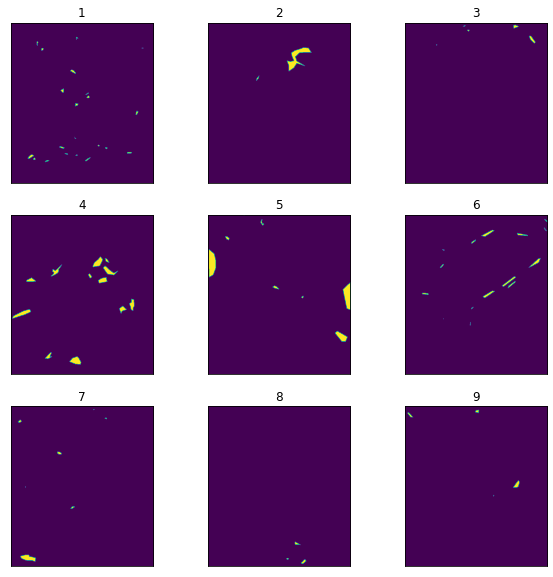

In [21]:
# Take a look at individual classes.
plt.figure(figsize=(10, 10))
plt.tight_layout()
for i in range(len(classes)):
  if i < 1: 
    continue
  C = np.zeros((nRows, nCols))
  C[GT_array[0, :, :] == classes[i]] = 1
  plt.subplot(3, 3, i)
  plt.title(str(classes[i]))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(C)
plt.show()

## Train/Test Split

In order to have completely different and unique train/test samples, we divide our ground truth data into two sets of train samples and test samples.

> You can also use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function in scikit-learn.

In [22]:
GT_array = GT_array[0, :, :].astype(int)
classes = np.unique(GT_array)
print(classes)

[0 1 2 3 4 5 6 7 8 9]


In [23]:
print(GT_array.shape)
print(GT_array.flatten().shape)
print(nRows * nCols)
print(GT_array.flatten()[1000])

(577, 513)
(296001,)
296001
0


In [24]:
for i in range(20):
  if i in classes:
    print(len(np.where(GT_array.flatten() == i)[0]))

# print(len(np.where(GT_array.flatten() == 9)[0]))
# print(len(np.where(GT_array.flatten() == 2)[0]))
# print(len(np.where(GT_array.flatten() == 4)[0]))

278862
1018
2203
388
4991
4954
1803
1033
256
493


In [25]:
def split_roi(gt_data, percent):
  import random

  Train = np.zeros_like(gt_data, dtype=int)
  Test = np.zeros_like(gt_data, dtype=int)
  
  labels = list(np.unique(gt_data))
  if 0 in labels: labels.remove(0) 

  for l in labels:
    ind = list(np.where(gt_data.flatten() == l)[0])

    random.shuffle(ind)
    train_inds = ind[:int(percent * len(ind))]
    test_inds = ind[int(percent * len(ind)):]

    temp = np.zeros((nRows*nCols, 1), dtype=int)
    temp[train_inds] = l
    temp = temp.reshape((nRows, nCols))
    Train = Train + temp
    
    temp = np.zeros((nRows*nCols, 1), dtype=int)
    temp[test_inds] = l
    temp = temp.reshape((nRows, nCols))
    Test = Test + temp

  return Train, Test

In [26]:
Train, Test = split_roi(GT_array, 0.7)

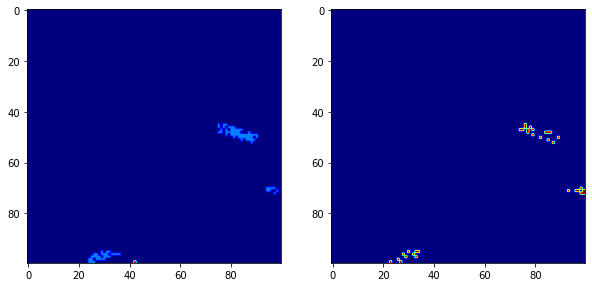

In [27]:
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(Train[400:500, 100:200], cmap='jet')
plt.subplot(122), plt.imshow(Test[400:500, 100:200], cmap='jet')
plt.show()

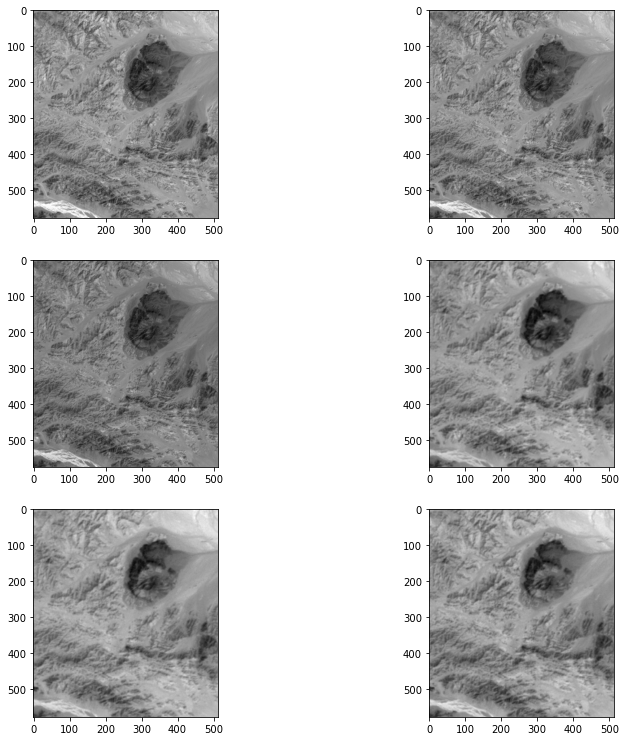

In [28]:
# Just show a few bands
plt.figure(figsize=(13, 13))
plt.subplot(321), plt.imshow(ASTER_array[0, :, :], cmap='gray')
plt.subplot(322), plt.imshow(ASTER_array[1, :, :], cmap='gray')
plt.subplot(323), plt.imshow(ASTER_array[2, :, :], cmap='gray')
plt.subplot(324), plt.imshow(ASTER_array[3, :, :], cmap='gray')
plt.subplot(325), plt.imshow(ASTER_array[4, :, :], cmap='gray')
plt.subplot(326), plt.imshow(ASTER_array[5, :, :], cmap='gray')
plt.show()

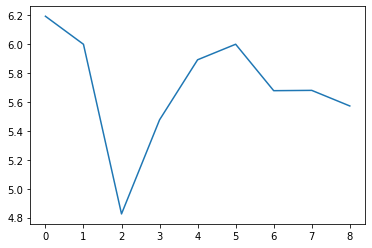

In [29]:
# Also, we can see the spectral curve of a pixel.
plt.plot(ASTER_array[:, 200, 300])

In [30]:
np.mean(ASTER_array[:, Train == c][:, :10], axis=1).shape

(9,)

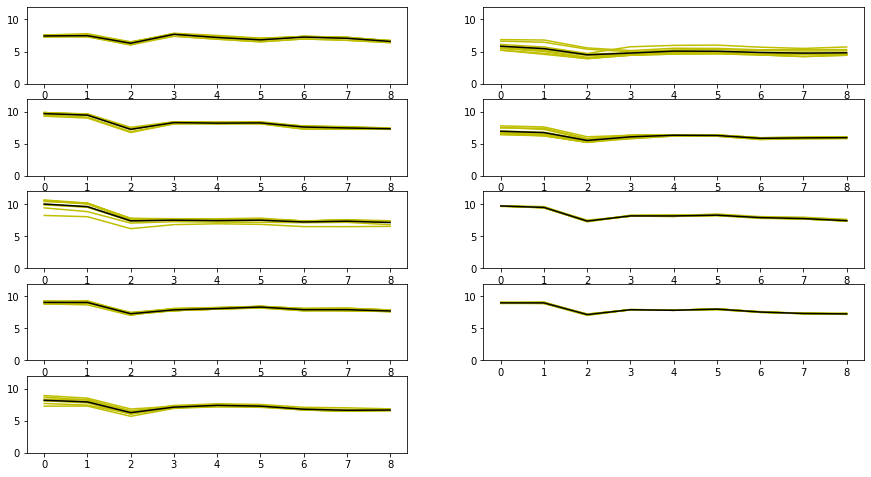

In [31]:
# Let's try it for a class.
classes = [1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.figure(figsize=(15, 15))
for c in classes:
  plt.subplot(9, 2, classes.index(c)+1), plt.plot(ASTER_array[:, Train == c][:, :10], 'y')
  plt.plot(np.mean(ASTER_array[:, Train == c][:, :10], axis=1), 'k')
  plt.ylim([0, 12])
plt.show()

## Data Standardization

[Standardization](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) of datasets is to make data look like Gaussian with **zero mean and unit variance**.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

> We are actually standardizing our datasets.

![picture](https://scikit-learn.org/stable/_images/sphx_glr_plot_all_scaling_002.png)

[Normalization](https://scikit-learn.org/stable/modules/preprocessing.html#normalization) is the process of scaling individual samples to have **unit norm**.




In [32]:
ASTER_array.reshape(9, nRows * nCols).T.shape
# [ # observations (# samples / # pixels),  # features]

(296001, 9)

In [33]:
# Prepare data for machine learning operation.
ASTER_data = ASTER_array.reshape(9, nRows * nCols).T
#SENTINEL_data = SENTINEL_array.reshape(13, nRows * nCols).T

Train_data = Train.reshape(1, nRows * nCols).T
Test_data = Test.reshape(1, nRows * nCols).T

print(ASTER_data.shape, Train_data.shape, Test_data.shape)

(296001, 9) (296001, 1) (296001, 1)


In [34]:
# Standardizing data
scaler = StandardScaler()
ASTER_standard = scaler.fit(ASTER_data)
print(scaler.mean_, scaler.var_)
ASTER_standard = ASTER_standard.transform(ASTER_data)
scaler = StandardScaler()

[8.2384316  8.07752868 6.46012962 7.04323447 7.05992048 7.05513815
 6.8208841  6.77236329 6.62702145] [1.10113581 1.31659135 0.75927081 0.76898328 0.5866939  0.71091151
 0.61332389 0.64961335 0.52019714]


In [35]:
# You can do the same operation mannually.
# ASTER_standard = np.zeros_like(ASTER_data, dtype=np.float)
# for i in range(48):
#   ASTER_standard[:, i] = (ASTER_data[:, i] - np.mean(ASTER_data[:, i])) / np.std(ASTER_data[:, i])

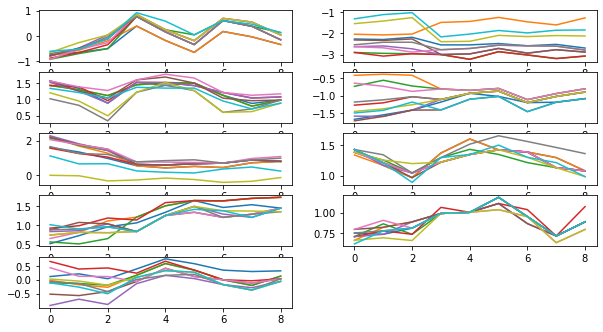

In [36]:
# See how standardization works.
plt.figure(figsize=(10, 10))
for c in classes:
  plt.subplot(9, 2, classes.index(c)+1), plt.plot(ASTER_standard[Train.flatten() == c, :][:10, :].T)
plt.show()

# Feature Extraction

Generating new features from image is referred to as **feature extraction**.
To extract eyes and lips from a face image in order to understand that whose face is that, is an example of feature extraction. Also, finding the wheels and windows of a car to determine its type is some kind of feature extraction.

In satellite image processing, **texture images**, are an example of features extracted from an image.



# Feature Selection and Dimensionality Reduction

> (Should we do this?)

## Principal Component Analysis ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and [Kernel PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html))

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 


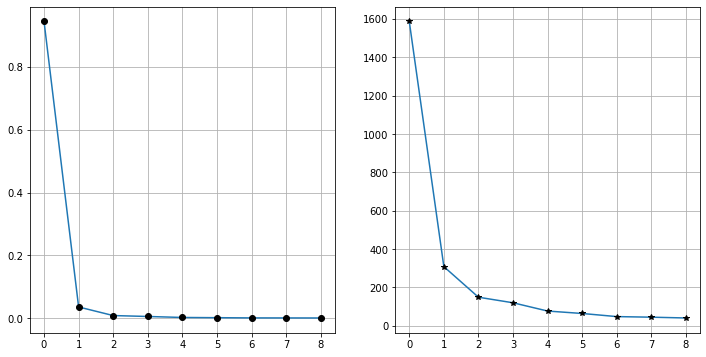

In [37]:
pca = PCA(n_components=9)   # change n components
pca.fit(ASTER_standard)

variances = pca.explained_variance_ratio_
svds = pca.singular_values_

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.grid(True), plt.plot(variances), plt.plot(variances, 'ok')
plt.subplot(122), plt.grid(True), plt.plot(svds), plt.plot(svds, '*k')
plt.show()

In [38]:
ASTER_pca = pca.transform(ASTER_standard)
print(ASTER_pca.shape)

(296001, 9)


# Classification-SVM

**Support vector machines (SVMs)** are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

* Effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

> https://scikit-learn.org/stable/modules/svm.html


In [39]:
# Extract train and test samples.
#features = np.hstack((ASTER_standard)), ASTER_pca[:, :3])) # ASTER_pca[:, :3] could be included
features = (ASTER_standard)
print(features.shape)

features = np.nan_to_num(features)

mask_train = np.zeros((nRows, nCols), dtype=int)
mask_test = np.zeros((nRows, nCols), dtype=int)

mask_train[Train != 0] = 1
mask_test[Test != 0] = 1

# plt.figure(), plt.imshow(mask_train, cmap='gray')
# plt.figure(), plt.imshow(mask_test, cmap='gray')

train_features = features[np.where(mask_train.flatten() == 1)[0]]
test_features = features[np.where(mask_test.flatten() == 1)[0]]

train_samples = Train_data[np.where(mask_train.flatten() == 1)[0]]
test_samples = Test_data[np.where(mask_test.flatten() == 1)[0]]

(296001, 9)


In [40]:
print(train_features.shape, test_features.shape, train_samples.shape, test_samples.shape)

(11994, 9) (5145, 9) (11994, 1) (5145, 1)


In [41]:
n = np.linspace(0, train_features.shape[0], num=11994, dtype=int)

In [42]:
clf = svm.SVC(probability=False)
clf.fit(train_features[n[:-1]], train_samples[n[:-1]])

/home/rohit/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [ ]:
features = np.nan_to_num(features)
classification_map = clf.predict(features)
print(classification_map.shape)

classification_map = classification_map.reshape(nRows, nCols)
print(classification_map.shape)

In [ ]:
# Total samples
plt.figure(figsize=(15, 15))
plt.imshow(classification_map, cmap='rainbow')
plt.show()

In [70]:
# 1000 samples
#plt.figure(figsize=(15, 15))
#plt.imshow(classification_map, cmap='jet')
#plt.show()

#Classification-NN

In [71]:
print(__doc__)

from sklearn.neural_network import MLPClassifier


Automatically created module for IPython interactive environment


In [72]:
clf2 = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=400,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
clf2.fit(train_features[n[:-1]], train_samples[n[:-1]])

/home/rohit/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier(alpha=0.1, hidden_layer_sizes=(15,), max_iter=400, random_state=1)

In [1]:
features = np.nan_to_num(features)
classification_map2 = clf2.predict(features)
print(classification_map2.shape)

classification_map2 = classification_map2.reshape(nRows, nCols)
print(classification_map2.shape)

NameError: name 'np' is not defined

In [2]:
# Total samples
plt.figure(figsize=(15, 15))
plt.imshow(classification_map2, cmap='rainbow')
plt.show()

NameError: name 'plt' is not defined

#Classification-CNN

In [3]:
# baseline model with weight decay on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.regularizers import l2



Using TensorFlow backend.


In [4]:
# load train and test dataset
#def load_dataset():
	# load dataset
trainX = train_features
testX = test_features
trainY = train_samples
testY = test_samples
	# one hot encode target values
	#trainY = to_categorical(trainY)
	#testY = to_categorical(testY)
	#return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm



NameError: name 'train_features' is not defined

In [1]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(577, (513, 9), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(577, 513, 9)))
	model.add(Conv2D(577, (513, 9), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(1154, (1024, 9), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(1154, (1024, 9), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(2308, (2048, 9), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(2308, (2048, 9), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(2308, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model



In [78]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()


In [ ]:

# run the test harness for evaluating a model
#def run_test_harness():
	# load dataset
trainX = train_features
testX = test_features
trainY = train_samples
testY = test_samples
	# prepare pixel data
#trainX, testX = prep_pixels(trainX, testX)
	# define model
model = define_model()
	# fit model
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))
	# learning curves
summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

In [ ]:
# fit model
model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)

In [ ]:
# evaluate the deep model on the test dataset
from keras.datasets import cifar10
from keras.models import load_model
from keras.utils import to_categorical

# load train and test dataset
def load_dataset():
	# load dataset
  trainX = train_features
  testX = test_features
  trainY = train_samples
  testY = test_samples
# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
  trainX = train_features
  testX = test_features
  trainY = train_samples
  testY = test_samples
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# load model
	model = load_model('final_model.h5')
	# evaluate model on test dataset
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
run_test_harness()

In [ ]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(577, 513))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 577, 513, 9)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [ ]:
# predict the class
result = model.predict_classes(ASTER)

# CM-SVM-Accuracy Assessment



In [ ]:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(clf, test_features, test_samples, cmap=plt.cm.Blues, normalize='true')


#from sklearn.metrics import precision_recall_fscore_support
#y_pred = clf.predict(test_features)
#precision_recall_fscore_support(test_samples, y_pred, average='weighted')

# CM-NN-Accuracy Assessment

In [ ]:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(clf2, test_features, test_samples, cmap=plt.cm.Blues, normalize='true')


#from sklearn.metrics import precision_recall_fscore_support
#y_pred = clf2.predict(test_features)
#precision_recall_fscore_support(test_samples, y_pred, average='weighted')

#ROC - SVM - Accuracy Assessment

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
#X_train = train_features
#X_test = test_features
#y_train = train_samples
#y_test = test_samples
#n_classes = classes

In [ ]:
X = ASTER_standard
y = GT_array.flatten()
print (X.shape)
print (y.shape)

In [ ]:
# Binarize the output
y = label_binarize(y, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]

In [ ]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(probability=False))
y_score = classifier.fit(X_train[n[:-1]], y_train[n[:-1]]).decision_function(X_test)


In [ ]:

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

#ROC - NN - Accuracy Assessment

In [ ]:
# Binarize the output
#y = label_binarize(y, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9])
#n_classes = y.shape[1]

In [ ]:
# shuffle and split training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=0)

# Learn to predict each class against the other
classifier2 = OneVsRestClassifier(MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=400,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False))
y_score2 = classifier2.fit(X_train[n[:-1]], y_train[n[:-1]]).predict_proba(X_test)


In [ ]:
#classifier2 = OneVsRestClassifier(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
#y_score2 = classifier2.fit(X_train, y_train).score(X_test, y_test)
#classifier2.predict_proba(X_test)
#classifier2.predict(X_test)
#y_score2 = classifier2.score(X_test, y_test)
# Learn to predict each class against the other
#classifier2 = OneVsRestClassifier(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1))
#y_score2 = classifier2.fit(X_train, y_train).predict_proba(X_test)

In [ ]:

# Compute ROC curve and ROC area for each class
fpr2 = dict()
tpr2 = dict()
roc_auc = dict()
for i in range(n_classes):
    #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score2[:, i])
    fpr2[i], tpr2[i], _ = roc_curve(y_test[:, i], classifier2.predict_proba(X_test)[:,i])
    roc_auc[i] = auc(fpr2[i], tpr2[i])

# Compute micro-average ROC curve and ROC area
fpr2["micro"], tpr2["micro"], _ = roc_curve(y_test.ravel(), y_score2.ravel())
roc_auc["micro"] = auc(fpr2["micro"], tpr2["micro"])

In [ ]:
# First aggregate all false positive rates
all_fpr2 = np.unique(np.concatenate([fpr2[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr2 = np.zeros_like(all_fpr2)
for i in range(n_classes):
    mean_tpr2 += interp(all_fpr2, fpr2[i], tpr2[i])

# Finally average it and compute AUC
mean_tpr2 /= n_classes

fpr2["macro"] = all_fpr2
tpr2["macro"] = mean_tpr2
roc_auc["macro"] = auc(fpr2["macro"], tpr2["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr2["micro"], tpr2["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# First aggregate all false positive rates
all_fpr2 = np.unique(np.concatenate([fpr2[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr2 = np.zeros_like(all_fpr2)
for i in range(n_classes):
    mean_tpr2 += interp(all_fpr2, fpr2[i], tpr2[i])

# Finally average it and compute AUC
mean_tpr2 /= n_classes

fpr2["macro"] = all_fpr2
tpr2["macro"] = mean_tpr2
roc_auc["macro"] = auc(fpr2["macro"], tpr2["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr2["micro"], tpr2["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr2[i], tpr2[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Further Reading

1. https://machine-learning-with-python.readthedocs.io/en/latest/#

2. https://scipy-lectures.org/packages/scikit-learn/index.html#scikit-learn-machine-learning-in-python

3. https://cs.stanford.edu/~karpathy/svmjs/demo/


> I recommend these fantastic review papers.
<table><tr><td><img src='http://uupload.ir/files/eeqb_paper_1.png'></td><td><img src='http://uupload.ir/files/vlyo_paper_2.png'></td></tr></table>

<center><img src="http://uupload.ir/files/rxxu_introduction-to-python_watermarked.png"  width="500"/>

# ***Any Questions?***

<center><img src="http://uupload.ir/files/65gx_ml-vs-ai-whats-the-difference.png"  width="500"/>

# Thank you so much for your time and consideration..!